In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.read_csv('bigmart_train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
df[df['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [5]:
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [6]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [7]:
df['Item_Weight']=df['Item_Weight'].fillna(12.857645184136183)
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')

In [8]:
df['Item_Weight'].isnull().sum()

0

In [9]:
df['Outlet_Size'].isnull().sum()

0

In [10]:
df_num_data=df.select_dtypes(include=[np.number])
df_num_data['Outlet_Establishment_Year'].unique()
df_num_data['Outlet_older_than_2010']=2010-df['Outlet_Establishment_Year']
df_num_data=df_num_data.drop('Outlet_Establishment_Year', axis=1)
df_num_data

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_older_than_2010
0,9.300,0.016047,249.8092,3735.1380,11
1,5.920,0.019278,48.2692,443.4228,1
2,17.500,0.016760,141.6180,2097.2700,11
3,19.200,0.000000,182.0950,732.3800,12
4,8.930,0.000000,53.8614,994.7052,23
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,23
8519,8.380,0.046982,108.1570,549.2850,8
8520,10.600,0.035186,85.1224,1193.1136,6
8521,7.210,0.145221,103.1332,1845.5976,1


In [11]:
df_num_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_older_than_2010
Item_Weight,1.000000,-0.012049,0.024756,0.011550,0.008301
Item_Visibility,-0.012049,1.000000,-0.001315,-0.128625,0.074834
Item_MRP,0.024756,-0.001315,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.011550,-0.128625,0.567574,1.000000,0.049135
Outlet_older_than_2010,0.008301,0.074834,-0.005020,0.049135,1.000000


In [12]:
df_num_data= df_num_data.drop('Item_Outlet_Sales', axis=1)
df_num_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_older_than_2010
0,9.300,0.016047,249.8092,11
1,5.920,0.019278,48.2692,1
2,17.500,0.016760,141.6180,11
3,19.200,0.000000,182.0950,12
4,8.930,0.000000,53.8614,23
...,...,...,...,...
8518,6.865,0.056783,214.5218,23
8519,8.380,0.046982,108.1570,8
8520,10.600,0.035186,85.1224,6
8521,7.210,0.145221,103.1332,1


In [13]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


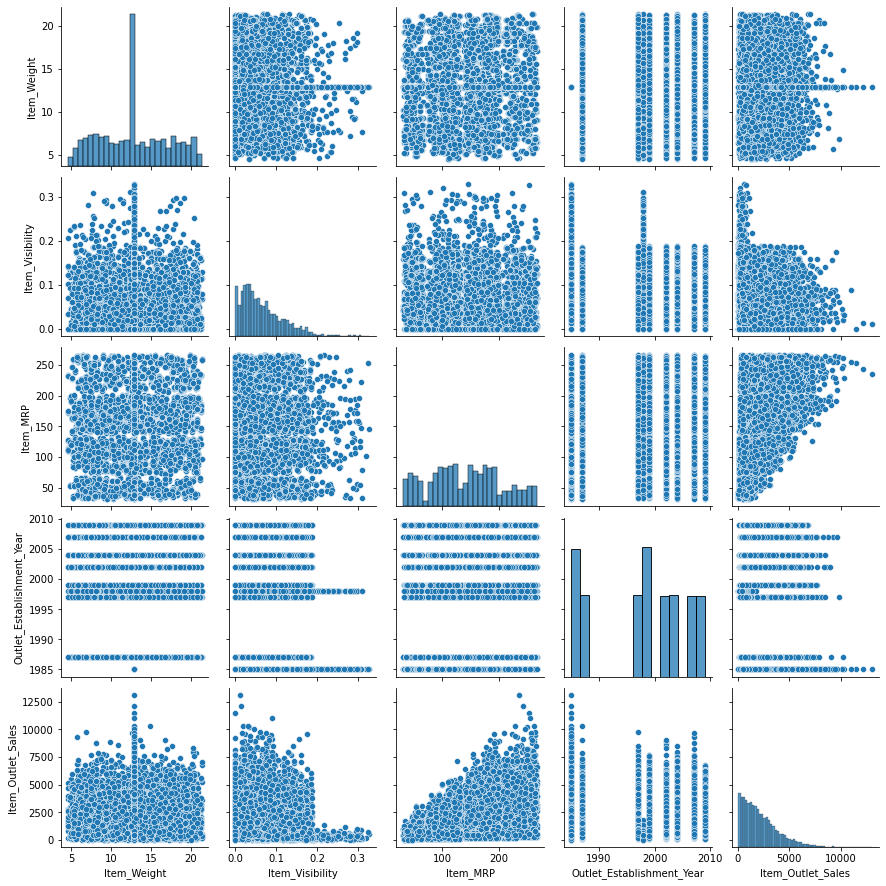

In [14]:
sns.pairplot(data=df)

In [15]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [16]:
table=pd.DataFrame(index=['MAE_train','MSE_train','RMSE_train','R_SQUARED_train','MAE_test','MSE_test','RMSE_test','R_SQUARED_test'], columns=['SLR_Item_Weight','SLR_Item_Visibility','SLR_Item_MRP','SLR_Outlet_older_than_2010','MLR'])
table

,SLR_Item_Weight,SLR_Item_Visibility,SLR_Item_MRP,SLR_Outlet_older_than_2010,MLR
MAE_train,NaN,NaN,NaN,NaN,NaN
MSE_train,NaN,NaN,NaN,NaN,NaN
RMSE_train,NaN,NaN,NaN,NaN,NaN
R_SQUARED_train,NaN,NaN,NaN,NaN,NaN
MAE_test,NaN,NaN,NaN,NaN,NaN
MSE_test,NaN,NaN,NaN,NaN,NaN
RMSE_test,NaN,NaN,NaN,NaN,NaN
R_SQUARED_test,NaN,NaN,NaN,NaN,NaN


In [17]:
s=str(table.index)
s.lower()

"index(['mae_train', 'mse_train', 'rmse_train', 'r_squared_train', 'mae_test',\n       'mse_test', 'rmse_test', 'r_squared_test'],\n      dtype='object')"

In [18]:
df_num_data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_older_than_2010'], dtype='object')

In [19]:
    for i in range(len(df_num_data.columns)):
        features=df_num_data[[df_num_data.columns[i]]]
        target=df[['Item_Outlet_Sales']]
        X_train,X_test,y_train,y_test =train_test_split(features, target, random_state=6)
        lin_model=LinearRegression()
        lin_model.fit(X_train,y_train)
        pred_lin_train=lin_model.predict(X_train)
        pred_lin_test=lin_model.predict(X_test)
        mae_train=mean_absolute_error(pred_lin_train,y_train)
        mse_train=mean_squared_error(pred_lin_train,y_train)
        rmse_train=np.sqrt(mean_squared_error(pred_lin_train,y_train))
        r_sq_train=lin_model.score(X_train,y_train)
        mae_test=mean_absolute_error(pred_lin_test,y_test)
        mse_test=mean_squared_error(pred_lin_test,y_test)
        rmse_test=np.sqrt(mean_squared_error(pred_lin_test,y_test))
        r_sq_test=lin_model.score(X_test,y_test)
        slr=[mae_train, mse_train, rmse_train, r_sq_train, mae_test,mse_test,rmse_test,r_sq_test]
        table[table.columns[i]]=slr
        print(slr)
          
    

[1348.6747905751063, 2909278.265031374, 1705.6606535390836, 3.330129053313868e-05, 1336.434443797577, 2918281.5655114837, 1708.2978562040882, 0.0001788249923901919]
[1332.0906091334343, 2856612.2255771756, 1690.151539234626, 0.018135483622187754, 1325.7089836249506, 2885114.8293421515, 1698.562577399535, 0.011541952361553864]
[1040.3932128317792, 2002799.3388588473, 1415.202932041496, 0.3116049890694843, 1005.270694400586, 1888439.7394925584, 1374.2051300633973, 0.35300895513843644]
[1347.8347005416006, 2902618.4922239045, 1703.7072789138117, 0.0023223745319918, 1334.1689158169238, 2911345.010974397, 1706.2663950785636, 0.0025553311492109154]


In [20]:
table

,SLR_Item_Weight,SLR_Item_Visibility,SLR_Item_MRP,SLR_Outlet_older_than_2010,MLR
MAE_train,1.348675e+03,1.332091e+03,1.040393e+03,1.347835e+03,NaN
MSE_train,2.909278e+06,2.856612e+06,2.002799e+06,2.902618e+06,NaN
RMSE_train,1.705661e+03,1.690152e+03,1.415203e+03,1.703707e+03,NaN
R_SQUARED_train,3.330129e-05,1.813548e-02,3.116050e-01,2.322375e-03,NaN
MAE_test,1.336434e+03,1.325709e+03,1.005271e+03,1.334169e+03,NaN
MSE_test,2.918282e+06,2.885115e+06,1.888440e+06,2.911345e+06,NaN
RMSE_test,1.708298e+03,1.698563e+03,1.374205e+03,1.706266e+03,NaN
R_SQUARED_test,1.788250e-04,1.154195e-02,3.530090e-01,2.555331e-03,NaN


In [74]:
3.116050e-01

0.311605

In [76]:
3.330129e-05

3.330129e-05

In [21]:
df_num_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_older_than_2010
0,9.300,0.016047,249.8092,11
1,5.920,0.019278,48.2692,1
2,17.500,0.016760,141.6180,11
3,19.200,0.000000,182.0950,12
4,8.930,0.000000,53.8614,23
...,...,...,...,...
8518,6.865,0.056783,214.5218,23
8519,8.380,0.046982,108.1570,8
8520,10.600,0.035186,85.1224,6
8521,7.210,0.145221,103.1332,1


In [22]:
def regressions_MLR():
    features=df_num_data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_older_than_2010']]
    target=df[['Item_Outlet_Sales']]
    X_train,X_test,y_train,y_test = train_test_split(features, target, random_state=10, train_size=.80)
    adv_model=LinearRegression()
    adv_model.fit(X_train,y_train)
    pred_adv_train=adv_model.predict(X_train)
    pred_adv_test=adv_model.predict(X_test)
    mae_train=mean_absolute_error(pred_adv_train,y_train)
    mse_train=mean_squared_error(pred_adv_train,y_train)
    rmse_train=np.sqrt(mean_squared_error(pred_adv_train,y_train))
    r_sq_train=adv_model.score(X_train,y_train)
    mae_test=mean_absolute_error(pred_adv_test,y_test)
    mse_test=mean_squared_error(pred_adv_test,y_test)
    rmse_test=np.sqrt(mean_squared_error(pred_adv_test,y_test))
    r_sq_test=adv_model.score(X_test,y_test)
    slr=[mae_train, mse_train, rmse_train, r_sq_train, mae_test,mse_test,rmse_test,r_sq_test]
    return slr

In [23]:
print(regressions_MLR())
table['MLR']=regressions_MLR()

[1027.177663844096, 1932219.4988913483, 1390.0429845480853, 0.3331337741234318, 1004.0078607170444, 1847988.9244358533, 1359.407563770282, 0.37744859883104864]


In [24]:
table

,SLR_Item_Weight,SLR_Item_Visibility,SLR_Item_MRP,SLR_Outlet_older_than_2010,MLR
MAE_train,1.348675e+03,1.332091e+03,1.040393e+03,1.347835e+03,1.027178e+03
MSE_train,2.909278e+06,2.856612e+06,2.002799e+06,2.902618e+06,1.932219e+06
RMSE_train,1.705661e+03,1.690152e+03,1.415203e+03,1.703707e+03,1.390043e+03
R_SQUARED_train,3.330129e-05,1.813548e-02,3.116050e-01,2.322375e-03,3.331338e-01
MAE_test,1.336434e+03,1.325709e+03,1.005271e+03,1.334169e+03,1.004008e+03
MSE_test,2.918282e+06,2.885115e+06,1.888440e+06,2.911345e+06,1.847989e+06
RMSE_test,1.708298e+03,1.698563e+03,1.374205e+03,1.706266e+03,1.359408e+03
R_SQUARED_test,1.788250e-04,1.154195e-02,3.530090e-01,2.555331e-03,3.774486e-01


In [25]:
def regressions(features,target):
    
    X_train,X_test,y_train,y_test = train_test_split(features, target, random_state=6)
    adv_model=LinearRegression()
    adv_model.fit(X_train,y_train)
    pred_adv_train=adv_model.predict(X_train)
    pred_adv_test=adv_model.predict(X_test)
    mae_train=mean_absolute_error(pred_adv_train,y_train)
    mse_train=mean_squared_error(pred_adv_train,y_train)
    rmse_train=np.sqrt(mean_squared_error(pred_adv_train,y_train))
    r_sq_train=adv_model.score(X_train,y_train)
    mae_test=mean_absolute_error(pred_adv_test,y_test)
    mse_test=mean_squared_error(pred_adv_test,y_test)
    rmse_test=np.sqrt(mean_squared_error(pred_adv_test,y_test))
    r_sq_test=adv_model.score(X_test,y_test)
    reg=[mae_train, mse_train, rmse_train, r_sq_train, mae_test,mse_test,rmse_test,r_sq_test]
    return reg

In [26]:
features=df_num_data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_older_than_2010']]
target=df[['Item_Outlet_Sales']]
print(regressions(features,target))

[1029.2224136898255, 1938580.470821975, 1392.32915318971, 0.3336780682374537, 1002.455870424474, 1846938.9933385325, 1359.021336601649, 0.367227365477515]


In [27]:
def poly_features(d):
        poly_feat=PolynomialFeatures(degree=d)
        Item_Weight_poly=poly_feat.fit_transform(features[['Item_Weight']])
        Item_Visibility_poly=poly_feat.fit_transform(features[['Item_Visibility']])
        Item_MRP_poly=poly_feat.fit_transform(features[['Item_MRP']])
        Outlet_older_than_2010_poly=poly_feat.fit_transform(features[['Outlet_older_than_2010']])
        polyfeatures=pd.concat([pd.DataFrame(Item_Weight_poly),pd.DataFrame(Item_Visibility_poly),pd.DataFrame(Item_MRP_poly),pd.DataFrame(Outlet_older_than_2010_poly)], axis=1)
        return (polyfeatures)        

In [28]:
loop=[2,3,5,10,15,30]
for i in range(6):
    p=poly_features(loop[i])
    
    table['Polynomial Regression, degree = '+str(loop[i])]=regressions(p,target)
    

In [29]:
table

,SLR_Item_Weight,SLR_Item_Visibility,SLR_Item_MRP,SLR_Outlet_older_than_2010,MLR,"Polynomial Regression, degree = 2","Polynomial Regression, degree = 3","Polynomial Regression, degree = 5","Polynomial Regression, degree = 10","Polynomial Regression, degree = 15","Polynomial Regression, degree = 30"
MAE_train,1.348675e+03,1.332091e+03,1.040393e+03,1.347835e+03,1.027178e+03,1.020633e+03,1.011622e+03,1.011582e+03,1.039714e+03,1.079885e+03,1.192821e+03
MSE_train,2.909278e+06,2.856612e+06,2.002799e+06,2.902618e+06,1.932219e+06,1.901896e+06,1.873337e+06,1.863177e+06,1.985999e+06,2.054688e+06,2.357318e+06
RMSE_train,1.705661e+03,1.690152e+03,1.415203e+03,1.703707e+03,1.390043e+03,1.379093e+03,1.368699e+03,1.364983e+03,1.409255e+03,1.433418e+03,1.535356e+03
R_SQUARED_train,3.330129e-05,1.813548e-02,3.116050e-01,2.322375e-03,3.331338e-01,3.462870e-01,3.561033e-01,3.595953e-01,3.173795e-01,2.937702e-01,1.897511e-01
MAE_test,1.336434e+03,1.325709e+03,1.005271e+03,1.334169e+03,1.004008e+03,9.879341e+02,9.823400e+02,9.824966e+02,1.009581e+03,1.050709e+03,1.169118e+03
MSE_test,2.918282e+06,2.885115e+06,1.888440e+06,2.911345e+06,1.847989e+06,1.797707e+06,1.776290e+06,1.777403e+06,1.874344e+06,1.939817e+06,2.278633e+06
RMSE_test,1.708298e+03,1.698563e+03,1.374205e+03,1.706266e+03,1.359408e+03,1.340786e+03,1.332775e+03,1.333193e+03,1.369067e+03,1.392773e+03,1.509514e+03
R_SQUARED_test,1.788250e-04,1.154195e-02,3.530090e-01,2.555331e-03,3.774486e-01,3.840946e-01,3.914322e-01,3.910507e-01,3.578384e-01,3.354069e-01,2.193262e-01


In [30]:
table.iloc[3::4,:]

,SLR_Item_Weight,SLR_Item_Visibility,SLR_Item_MRP,SLR_Outlet_older_than_2010,MLR,"Polynomial Regression, degree = 2","Polynomial Regression, degree = 3","Polynomial Regression, degree = 5","Polynomial Regression, degree = 10","Polynomial Regression, degree = 15","Polynomial Regression, degree = 30"
R_SQUARED_train,0.000033,0.018135,0.311605,0.002322,0.333134,0.346287,0.356103,0.359595,0.317379,0.293770,0.189751
R_SQUARED_test,0.000179,0.011542,0.353009,0.002555,0.377449,0.384095,0.391432,0.391051,0.357838,0.335407,0.219326


In [31]:
sty=pd.DataFrame(table.iloc[3::4,:].stack())
sty

0
R_SQUARED_train SLR_Item_Weight                     0.000033
                SLR_Item_Visibility                 0.018135
                SLR_Item_MRP                        0.311605
                SLR_Outlet_older_than_2010          0.002322
                MLR                                 0.333134
                Polynomial Regression, degree = 2   0.346287
                Polynomial Regression, degree = 3   0.356103
                Polynomial Regression, degree = 5   0.359595
                Polynomial Regression, degree = 10  0.317379
                Polynomial Regression, degree = 15  0.293770
                Polynomial Regression, degree = 30  0.189751
R_SQUARED_test  SLR_Item_Weight                     0.000179
                SLR_Item_Visibility                 0.011542
                SLR_Item_MRP                        0.353009
                SLR_Outlet_older_than_2010          0.002555
                MLR                                 0.377449
                Polynomial Regression, degree = 2   0.384095
                Polynomial Regression, degree = 3   0.391432
                Polynomial Regression, degree = 5   0.391051
                Polynomial Regression, degree = 10  0.357838
                Polynomial Regression, degree = 15  0.335407
                Polynomial Regression, degree = 30  0.219326

## Outlier correction

<AxesSubplot:>

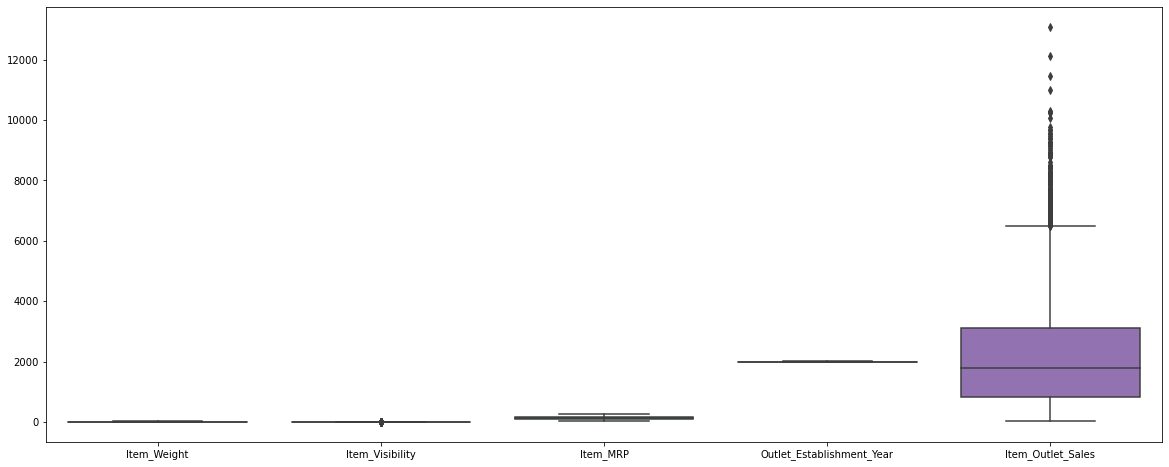

In [32]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df)

<AxesSubplot:>

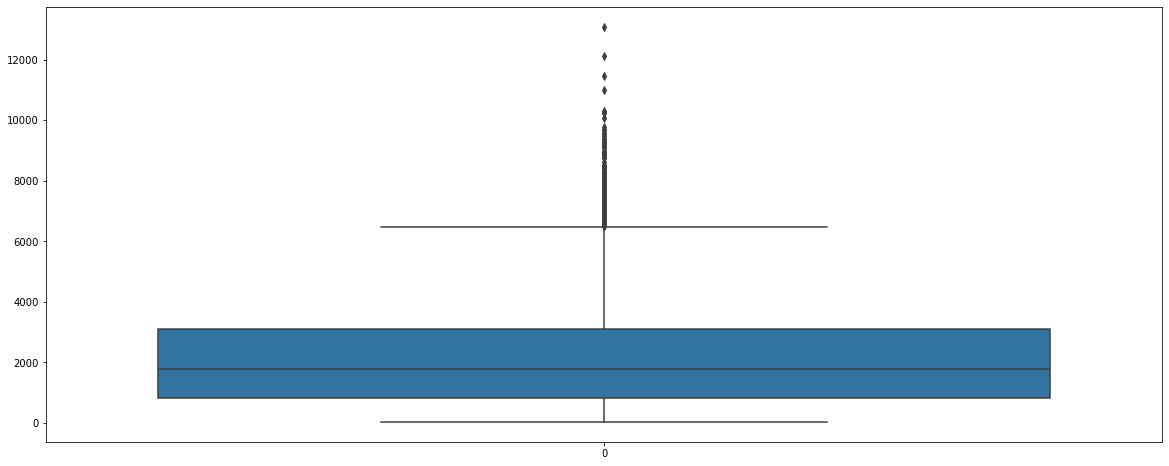

In [33]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df['Item_Outlet_Sales'])

In [35]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [38]:
Q1,Q3 = np.percentile(df['Item_Outlet_Sales'] , [25,75])
IQR = Q3 - Q1
IQR

2267.049

In [39]:
u = Q3+1.5*IQR
l = Q1-1.5*IQR
print(u,l)

6501.8699 -2566.3261


In [40]:
df_ref=df[df['Item_Outlet_Sales']<=6000]

<AxesSubplot:>

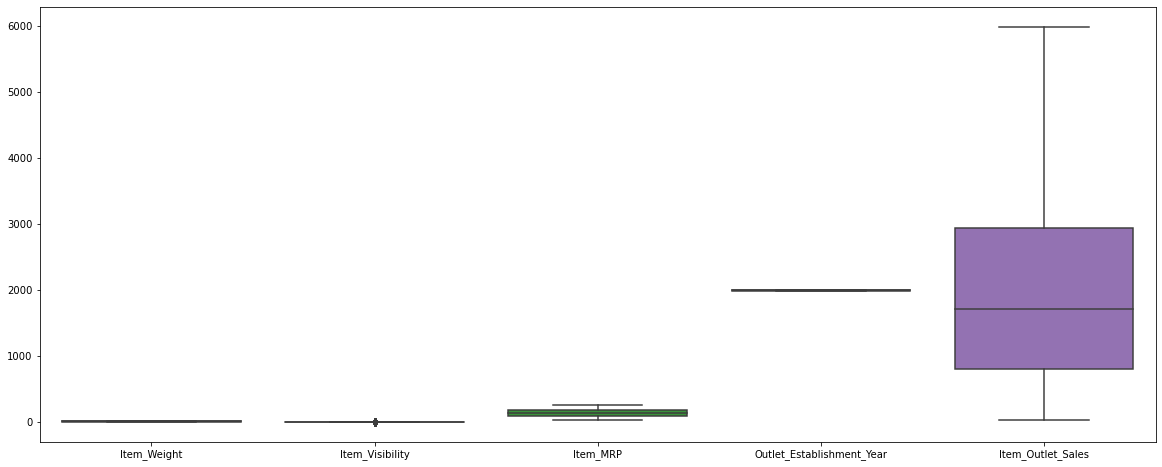

In [41]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df_ref)

In [42]:
df_ref

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [43]:
df_ref.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [44]:
df_num=df.select_dtypes(include=[np.number])
df_num['Outlet_Establishment_Year'].unique()
df_num['Outlet_older_than_2010']=2010-df['Outlet_Establishment_Year']
df_num=df_num.drop('Outlet_Establishment_Year', axis=1)
df_num

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_older_than_2010
0,9.300,0.016047,249.8092,3735.1380,11
1,5.920,0.019278,48.2692,443.4228,1
2,17.500,0.016760,141.6180,2097.2700,11
3,19.200,0.000000,182.0950,732.3800,12
4,8.930,0.000000,53.8614,994.7052,23
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,23
8519,8.380,0.046982,108.1570,549.2850,8
8520,10.600,0.035186,85.1224,1193.1136,6
8521,7.210,0.145221,103.1332,1845.5976,1


In [45]:
df_num.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_older_than_2010
Item_Weight,1.000000,-0.012049,0.024756,0.011550,0.008301
Item_Visibility,-0.012049,1.000000,-0.001315,-0.128625,0.074834
Item_MRP,0.024756,-0.001315,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.011550,-0.128625,0.567574,1.000000,0.049135
Outlet_older_than_2010,0.008301,0.074834,-0.005020,0.049135,1.000000


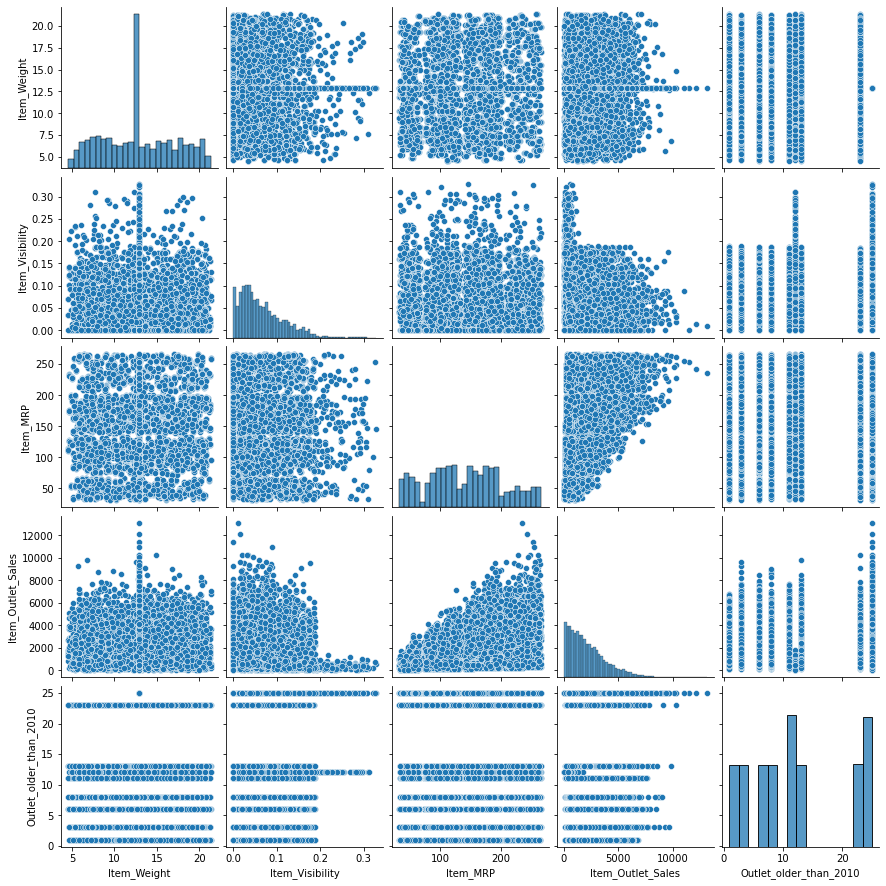

In [46]:
sns.pairplot(data=df_num)

In [47]:
table2=pd.DataFrame(index=['MAE_train','MSE_train','RMSE_train','R_SQUARED_train','MAE_test','MSE_test','RMSE_test','R_SQUARED_test'], columns=['SLR_Item_Weight','SLR_Item_Visibility','SLR_Item_MRP','SLR_Outlet_older_than_2010','MLR'])
table2

,SLR_Item_Weight,SLR_Item_Visibility,SLR_Item_MRP,SLR_Outlet_older_than_2010,MLR
MAE_train,NaN,NaN,NaN,NaN,NaN
MSE_train,NaN,NaN,NaN,NaN,NaN
RMSE_train,NaN,NaN,NaN,NaN,NaN
R_SQUARED_train,NaN,NaN,NaN,NaN,NaN
MAE_test,NaN,NaN,NaN,NaN,NaN
MSE_test,NaN,NaN,NaN,NaN,NaN
RMSE_test,NaN,NaN,NaN,NaN,NaN
R_SQUARED_test,NaN,NaN,NaN,NaN,NaN


In [48]:
df_num.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_older_than_2010'],
      dtype='object')

In [49]:
df_nums= df_num[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_older_than_2010']]
df_nums

,Item_Weight,Item_Visibility,Item_MRP,Outlet_older_than_2010
0,9.300,0.016047,249.8092,11
1,5.920,0.019278,48.2692,1
2,17.500,0.016760,141.6180,11
3,19.200,0.000000,182.0950,12
4,8.930,0.000000,53.8614,23
...,...,...,...,...
8518,6.865,0.056783,214.5218,23
8519,8.380,0.046982,108.1570,8
8520,10.600,0.035186,85.1224,6
8521,7.210,0.145221,103.1332,1


In [50]:
for i in range(len(df_nums.columns)):
        features=df_nums[[df_nums.columns[i]]]
        target=df_num[['Item_Outlet_Sales']]
        X_train,X_test,y_train,y_test =train_test_split(features, target, random_state=6)
        lin_model=LinearRegression()
        lin_model.fit(X_train,y_train)
        pred_lin_train=lin_model.predict(X_train)
        pred_lin_test=lin_model.predict(X_test)
        mae_train=mean_absolute_error(pred_lin_train,y_train)
        mse_train=mean_squared_error(pred_lin_train,y_train)
        rmse_train=np.sqrt(mean_squared_error(pred_lin_train,y_train))
        r_sq_train=lin_model.score(X_train,y_train)
        mae_test=mean_absolute_error(pred_lin_test,y_test)
        mse_test=mean_squared_error(pred_lin_test,y_test)
        rmse_test=np.sqrt(mean_squared_error(pred_lin_test,y_test))
        r_sq_test=lin_model.score(X_test,y_test)
        slr=[mae_train, mse_train, rmse_train, r_sq_train, mae_test,mse_test,rmse_test,r_sq_test]
        table2[table2.columns[i]]=slr
        print(slr)

[1348.6747905751063, 2909278.265031374, 1705.6606535390836, 3.330129053313868e-05, 1336.434443797577, 2918281.5655114832, 1708.297856204088, 0.00017882499239041394]
[1332.0906091334343, 2856612.2255771756, 1690.151539234626, 0.018135483622187754, 1325.7089836249506, 2885114.8293421515, 1698.562577399535, 0.011541952361553864]
[1040.3932128317792, 2002799.3388588473, 1415.202932041496, 0.3116049890694843, 1005.270694400586, 1888439.7394925584, 1374.2051300633973, 0.35300895513843644]
[1347.8347005416006, 2902618.4922239045, 1703.7072789138117, 0.0023223745319918, 1334.1689158169238, 2911345.010974397, 1706.2663950785636, 0.0025553311492109154]


In [51]:
def regressions_MLR():
    features=df_nums[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_older_than_2010']]
    target=df_num[['Item_Outlet_Sales']]
    X_train,X_test,y_train,y_test = train_test_split(features, target, random_state=10, train_size=.80)
    adv_model=LinearRegression()
    adv_model.fit(X_train,y_train)
    pred_adv_train=adv_model.predict(X_train)
    pred_adv_test=adv_model.predict(X_test)
    mae_train=mean_absolute_error(pred_adv_train,y_train)
    mse_train=mean_squared_error(pred_adv_train,y_train)
    rmse_train=np.sqrt(mean_squared_error(pred_adv_train,y_train))
    r_sq_train=adv_model.score(X_train,y_train)
    mae_test=mean_absolute_error(pred_adv_test,y_test)
    mse_test=mean_squared_error(pred_adv_test,y_test)
    rmse_test=np.sqrt(mean_squared_error(pred_adv_test,y_test))
    r_sq_test=adv_model.score(X_test,y_test)
    mlr=[mae_train, mse_train, rmse_train, r_sq_train, mae_test,mse_test,rmse_test,r_sq_test]
    return mlr

In [52]:
print(regressions_MLR())
table2['MLR']=regressions_MLR()

[1027.177663844096, 1932219.4988913478, 1390.042984548085, 0.3331337741234319, 1004.0078607170444, 1847988.924435853, 1359.407563770282, 0.37744859883104875]


In [53]:
table2

,SLR_Item_Weight,SLR_Item_Visibility,SLR_Item_MRP,SLR_Outlet_older_than_2010,MLR
MAE_train,1.348675e+03,1.332091e+03,1.040393e+03,1.347835e+03,1.027178e+03
MSE_train,2.909278e+06,2.856612e+06,2.002799e+06,2.902618e+06,1.932219e+06
RMSE_train,1.705661e+03,1.690152e+03,1.415203e+03,1.703707e+03,1.390043e+03
R_SQUARED_train,3.330129e-05,1.813548e-02,3.116050e-01,2.322375e-03,3.331338e-01
MAE_test,1.336434e+03,1.325709e+03,1.005271e+03,1.334169e+03,1.004008e+03
MSE_test,2.918282e+06,2.885115e+06,1.888440e+06,2.911345e+06,1.847989e+06
RMSE_test,1.708298e+03,1.698563e+03,1.374205e+03,1.706266e+03,1.359408e+03
R_SQUARED_test,1.788250e-04,1.154195e-02,3.530090e-01,2.555331e-03,3.774486e-01


In [54]:
features=df_nums[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_older_than_2010']]
target=df_num[['Item_Outlet_Sales']]
print(regressions(features,target))

[1029.2224136898255, 1938580.470821975, 1392.32915318971, 0.3336780682374537, 1002.455870424474, 1846938.9933385325, 1359.021336601649, 0.367227365477515]


In [55]:
def poly_features(d):
        poly_feat=PolynomialFeatures(degree=d)
        Item_Weight_poly=poly_feat.fit_transform(df_nums[['Item_Weight']])
        Item_Visibility_poly=poly_feat.fit_transform(df_nums[['Item_Visibility']])
        Item_MRP_poly=poly_feat.fit_transform(df_nums[['Item_MRP']])
        Outlet_older_than_2010_poly=poly_feat.fit_transform(df_nums[['Outlet_older_than_2010']])
        polyfeatures=pd.concat([pd.DataFrame(Item_Weight_poly),pd.DataFrame(Item_Visibility_poly),pd.DataFrame(Item_MRP_poly),pd.DataFrame(Outlet_older_than_2010_poly)], axis=1)
        return (polyfeatures)        

In [56]:
loop=[2,3,5,10,15,30]
for i in range(6):
    p=poly_features(loop[i])
    
    table2['Polynomial Regression, degree = '+str(loop[i])]=regressions(p,target)

In [57]:
table2

,SLR_Item_Weight,SLR_Item_Visibility,SLR_Item_MRP,SLR_Outlet_older_than_2010,MLR,"Polynomial Regression, degree = 2","Polynomial Regression, degree = 3","Polynomial Regression, degree = 5","Polynomial Regression, degree = 10","Polynomial Regression, degree = 15","Polynomial Regression, degree = 30"
MAE_train,1.348675e+03,1.332091e+03,1.040393e+03,1.347835e+03,1.027178e+03,1.020633e+03,1.011622e+03,1.011583e+03,1.038867e+03,1.079885e+03,1.192854e+03
MSE_train,2.909278e+06,2.856612e+06,2.002799e+06,2.902618e+06,1.932219e+06,1.901896e+06,1.873337e+06,1.863177e+06,1.987182e+06,2.054688e+06,2.356856e+06
RMSE_train,1.705661e+03,1.690152e+03,1.415203e+03,1.703707e+03,1.390043e+03,1.379093e+03,1.368699e+03,1.364983e+03,1.409675e+03,1.433418e+03,1.535205e+03
R_SQUARED_train,3.330129e-05,1.813548e-02,3.116050e-01,2.322375e-03,3.331338e-01,3.462870e-01,3.561033e-01,3.595953e-01,3.169729e-01,2.937702e-01,1.899100e-01
MAE_test,1.336434e+03,1.325709e+03,1.005271e+03,1.334169e+03,1.004008e+03,9.879341e+02,9.823400e+02,9.824996e+02,1.007387e+03,1.050709e+03,1.169767e+03
MSE_test,2.918282e+06,2.885115e+06,1.888440e+06,2.911345e+06,1.847989e+06,1.797707e+06,1.776290e+06,1.777415e+06,1.876107e+06,1.939817e+06,2.280745e+06
RMSE_test,1.708298e+03,1.698563e+03,1.374205e+03,1.706266e+03,1.359408e+03,1.340786e+03,1.332775e+03,1.333197e+03,1.369710e+03,1.392773e+03,1.510214e+03
R_SQUARED_test,1.788250e-04,1.154195e-02,3.530090e-01,2.555331e-03,3.774486e-01,3.840946e-01,3.914322e-01,3.910466e-01,3.572344e-01,3.354069e-01,2.186027e-01


In [58]:
table2.iloc[3::4,:]

,SLR_Item_Weight,SLR_Item_Visibility,SLR_Item_MRP,SLR_Outlet_older_than_2010,MLR,"Polynomial Regression, degree = 2","Polynomial Regression, degree = 3","Polynomial Regression, degree = 5","Polynomial Regression, degree = 10","Polynomial Regression, degree = 15","Polynomial Regression, degree = 30"
R_SQUARED_train,0.000033,0.018135,0.311605,0.002322,0.333134,0.346287,0.356103,0.359595,0.316973,0.293770,0.189910
R_SQUARED_test,0.000179,0.011542,0.353009,0.002555,0.377449,0.384095,0.391432,0.391047,0.357234,0.335407,0.218603


In [59]:
table.iloc[3::4,:]

,SLR_Item_Weight,SLR_Item_Visibility,SLR_Item_MRP,SLR_Outlet_older_than_2010,MLR,"Polynomial Regression, degree = 2","Polynomial Regression, degree = 3","Polynomial Regression, degree = 5","Polynomial Regression, degree = 10","Polynomial Regression, degree = 15","Polynomial Regression, degree = 30"
R_SQUARED_train,0.000033,0.018135,0.311605,0.002322,0.333134,0.346287,0.356103,0.359595,0.317379,0.293770,0.189751
R_SQUARED_test,0.000179,0.011542,0.353009,0.002555,0.377449,0.384095,0.391432,0.391051,0.357838,0.335407,0.219326


In [60]:
a=pd.concat([table,table2])
a

,SLR_Item_Weight,SLR_Item_Visibility,SLR_Item_MRP,SLR_Outlet_older_than_2010,MLR,"Polynomial Regression, degree = 2","Polynomial Regression, degree = 3","Polynomial Regression, degree = 5","Polynomial Regression, degree = 10","Polynomial Regression, degree = 15","Polynomial Regression, degree = 30"
MAE_train,1.348675e+03,1.332091e+03,1.040393e+03,1.347835e+03,1.027178e+03,1.020633e+03,1.011622e+03,1.011582e+03,1.039714e+03,1.079885e+03,1.192821e+03
MSE_train,2.909278e+06,2.856612e+06,2.002799e+06,2.902618e+06,1.932219e+06,1.901896e+06,1.873337e+06,1.863177e+06,1.985999e+06,2.054688e+06,2.357318e+06
RMSE_train,1.705661e+03,1.690152e+03,1.415203e+03,1.703707e+03,1.390043e+03,1.379093e+03,1.368699e+03,1.364983e+03,1.409255e+03,1.433418e+03,1.535356e+03
R_SQUARED_train,3.330129e-05,1.813548e-02,3.116050e-01,2.322375e-03,3.331338e-01,3.462870e-01,3.561033e-01,3.595953e-01,3.173795e-01,2.937702e-01,1.897511e-01
MAE_test,1.336434e+03,1.325709e+03,1.005271e+03,1.334169e+03,1.004008e+03,9.879341e+02,9.823400e+02,9.824966e+02,1.009581e+03,1.050709e+03,1.169118e+03
MSE_test,2.918282e+06,2.885115e+06,1.888440e+06,2.911345e+06,1.847989e+06,1.797707e+06,1.776290e+06,1.777403e+06,1.874344e+06,1.939817e+06,2.278633e+06
RMSE_test,1.708298e+03,1.698563e+03,1.374205e+03,1.706266e+03,1.359408e+03,1.340786e+03,1.332775e+03,1.333193e+03,1.369067e+03,1.392773e+03,1.509514e+03
R_SQUARED_test,1.788250e-04,1.154195e-02,3.530090e-01,2.555331e-03,3.774486e-01,3.840946e-01,3.914322e-01,3.910507e-01,3.578384e-01,3.354069e-01,2.193262e-01
MAE_train,1.348675e+03,1.332091e+03,1.040393e+03,1.347835e+03,1.027178e+03,1.020633e+03,1.011622e+03,1.011583e+03,1.038867e+03,1.079885e+03,1.192854e+03
MSE_train,2.909278e+06,2.856612e+06,2.002799e+06,2.902618e+06,1.932219e+06,1.901896e+06,1.873337e+06,1.863177e+06,1.987182e+06,2.054688e+06,2.356856e+06


In [71]:
table.loc[['R_SQUARED_train','R_SQUARED_test'],:].stack()

R_SQUARED_train  SLR_Item_Weight                       0.000033
                 SLR_Item_Visibility                   0.018135
                 SLR_Item_MRP                          0.311605
                 SLR_Outlet_older_than_2010            0.002322
                 MLR                                   0.333134
                 Polynomial Regression, degree = 2     0.346287
                 Polynomial Regression, degree = 3     0.356103
                 Polynomial Regression, degree = 5     0.359595
                 Polynomial Regression, degree = 10    0.317379
                 Polynomial Regression, degree = 15    0.293770
                 Polynomial Regression, degree = 30    0.189751
R_SQUARED_test   SLR_Item_Weight                       0.000179
                 SLR_Item_Visibility                   0.011542
                 SLR_Item_MRP                          0.353009
                 SLR_Outlet_older_than_2010            0.002555
                 MLR                    

In [72]:
table.loc[['MAE_train','MAE_test','MSE_train','MSE_test'],:].stack()

MAE_train  SLR_Item_Weight                       1.348675e+03
           SLR_Item_Visibility                   1.332091e+03
           SLR_Item_MRP                          1.040393e+03
           SLR_Outlet_older_than_2010            1.347835e+03
           MLR                                   1.027178e+03
           Polynomial Regression, degree = 2     1.020633e+03
           Polynomial Regression, degree = 3     1.011622e+03
           Polynomial Regression, degree = 5     1.011582e+03
           Polynomial Regression, degree = 10    1.039714e+03
           Polynomial Regression, degree = 15    1.079885e+03
           Polynomial Regression, degree = 30    1.192821e+03
MAE_test   SLR_Item_Weight                       1.336434e+03
           SLR_Item_Visibility                   1.325709e+03
           SLR_Item_MRP                          1.005271e+03
           SLR_Outlet_older_than_2010            1.334169e+03
           MLR                                   1.004008e+03
        

In [73]:
table.loc[['RMSE_train','RMSE_test'],:].stack()

RMSE_train  SLR_Item_Weight                       1705.660654
            SLR_Item_Visibility                   1690.151539
            SLR_Item_MRP                          1415.202932
            SLR_Outlet_older_than_2010            1703.707279
            MLR                                   1390.042985
            Polynomial Regression, degree = 2     1379.092633
            Polynomial Regression, degree = 3     1368.699017
            Polynomial Regression, degree = 5     1364.982594
            Polynomial Regression, degree = 10    1409.254839
            Polynomial Regression, degree = 15    1433.418121
            Polynomial Regression, degree = 30    1535.355962
RMSE_test   SLR_Item_Weight                       1708.297856
            SLR_Item_Visibility                   1698.562577
            SLR_Item_MRP                          1374.205130
            SLR_Outlet_older_than_2010            1706.266395
            MLR                                   1359.407564
        